In [1]:
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
from plotly.subplots import make_subplots
import seaborn as sns
warnings.filterwarnings("ignore")

def set_seed(seed):
    """Set the random seed for reproducibility."""
    np.random.seed(seed)


set_seed(42)
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("data/diabetic_cleaned.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source
0,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,Unknown,59,0,18,0,0,0,276,250.01,255,9,Not Measured,Not Measured,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
1,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,11,5,13,2,0,1,648,250,V27,6,Not Measured,Not Measured,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,Unknown,44,1,16,0,0,0,8,250.43,403,7,Not Measured,Not Measured,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,Unknown,51,0,8,0,0,0,197,157,250,5,Not Measured,Not Measured,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,Unknown,31,6,16,0,0,0,414,411,250,9,Not Measured,Not Measured,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,Urgent,Discharged to home,Clinic Referral


In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
def plot_demographics_plotly(df):

    fig = sp.make_subplots(
        rows=2, cols=2,
        specs=[
        [{"type": "xy"}, {"type": "domain"}], 
        [{"type": "xy"}, {"type": "xy"}] ],
        subplot_titles=('Distribution par Âge', 'Distribution par Genre', 
                        'Distribution par Race', 'Distribution du Poids'))
    
    # Âge 
    age_counts = df['age'].value_counts().sort_index()
    fig.add_trace(
        go.Bar(x=age_counts.index, y=age_counts.values, name='Âge'),
        row=1, col=1
    )
    gender_counts = df['gender'].value_counts()
    fig.add_trace(
        go.Pie(labels=gender_counts.index, values=gender_counts.values, name='Genre'),
        row=1, col=2
    )
    
    
    # Race
    race_counts = df['race'].value_counts()
    fig.add_trace(
        go.Bar(y=race_counts.index, x=race_counts.values, orientation='h', name='Race'),
        row=2, col=1
    )
    
    fig.update_layout(
        height=800,
        showlegend=False,
        title_text="Analyse Démographique",
        template='plotly_white'
    )
    fig.show()


def plot_hospital_stats_plotly(df):
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            'Durée d\'Hospitalisation', 
            'Nombre de Diagnostics',
            'Top 5 Types d\'Admission', 
            'Top 5 Sources d\'Admission'
        )
    )
    
    # Durée d'hospitalisation
    fig.add_trace(
        go.Histogram(x=df['time_in_hospital'], nbinsx=20, name='Jours'),
        row=1, col=1
    )
    
    # Nombre de diagnostics
    fig.add_trace(
        go.Box(y=df['number_diagnoses'], name='Diagnostics'),
        row=1, col=2
    )
    
    # Types d'admission (top 5)
    top_admit = df['admission_type'].value_counts().nlargest(5)
    fig.add_trace(
        go.Bar(x=top_admit.index, y=top_admit.values, name='Admission'),
        row=2, col=1
    )
    
    
    fig.update_layout(
        height=700,
        width=1000,
        title_text="Statistiques d'Hospitalisation",
        template='plotly_white'
    )
    fig.show()


def plot_medications_plotly(df):
    # Créer un dashboard interactif
    from plotly.subplots import make_subplots
    
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{"type": "bar"}, {"type": "bar"}]],
        subplot_titles=(
            'Insuline vs Réadmission', 
            'Médicaments pour Diabète'
        )
    )

    
    # Insulin vs Readmission (stacked bar)
    if 'insulin' in df and 'readmitted' in df:
        insulin_readmit = pd.crosstab(df['insulin'], df['readmitted'])
        for col in insulin_readmit.columns:
            fig.add_trace(
                go.Bar(x=insulin_readmit.index, y=insulin_readmit[col], name=col),
                row=1, col=1
            )
    
    # DiabetesMed
    if 'diabetesMed' in df:
        diabetes_counts = df['diabetesMed'].value_counts()
        fig.add_trace(
            go.Bar(x=diabetes_counts.index, y=diabetes_counts.values, name='DiabetesMed'),
            row=1, col=2
        )
    
    fig.update_layout(
        height=700,
        title_text="Médications et Tests Biologiques",
        template='plotly_white',
        barmode='stack'  # Pour les barres empilées
    )
    fig.show()



In [5]:
plot_demographics_plotly(df)

In [6]:
plot_hospital_stats_plotly(df)

In [7]:
plot_medications_plotly(df)

**insulin:** The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: 

up if the dosage was increased during the encounter, down if the dosage was decreased, 

steady if the dosage did not change, and no if the drug was not prescribed


In [8]:
def plot_readmission_advanced(df):
    # Heatmap des corrélations
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    corr_matrix = df[numeric_cols].corr()
    
    fig_heatmap = go.Figure(
        go.Heatmap(
            z=corr_matrix.values,
            x=corr_matrix.columns,
            y=corr_matrix.index,
            colorscale='RdBu'
        )
    )
    fig_heatmap.update_layout(title='Matrice de Corrélation')
    
    # Sunburst: Réadmission par Âge et Genre
    if {'readmitted', 'age', 'gender'}.issubset(df.columns):
        fig_sunburst = px.sunburst(
            df, 
            path=['age', 'gender', 'readmitted'],
            title='Réadmission par Âge et Genre'
        )
    
    fig_heatmap.show()
    fig_sunburst.show()

plot_readmission_advanced(df)

In [9]:
def plot_drugs_interactive(df):
    # Liste des colonnes de médicaments
    drug_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'
]
    
    # Dashboard interactif avec dropdown
    fig = go.Figure()
    for drug in drug_cols:
        counts = df[drug].value_counts()
        fig.add_trace(
            go.Bar(
                x=counts.index,
                y=counts.values,
                name=drug,
                visible=False  # Masqué par défaut
            )
        )
    
    # Configurer les boutons de sélection
    buttons = []
    for i, drug in enumerate(drug_cols):
        args = [False] * len(drug_cols)
        args[i] = True
        buttons.append(
            dict(
                label=drug,
                method="update",
                args=[{"visible": args}]
            )
        )
    
    fig.update_layout(
        updatemenus=[{
            "buttons": buttons,
            "direction": "down",
            "showactive": True,
            "x": 0.1,
            "y": 1.2
        }],
        title="Prescription de Médicaments (Sélectionnez un médicament)"
    )
    fig.show()

plot_drugs_interactive(df)

## Variables médicales importantes

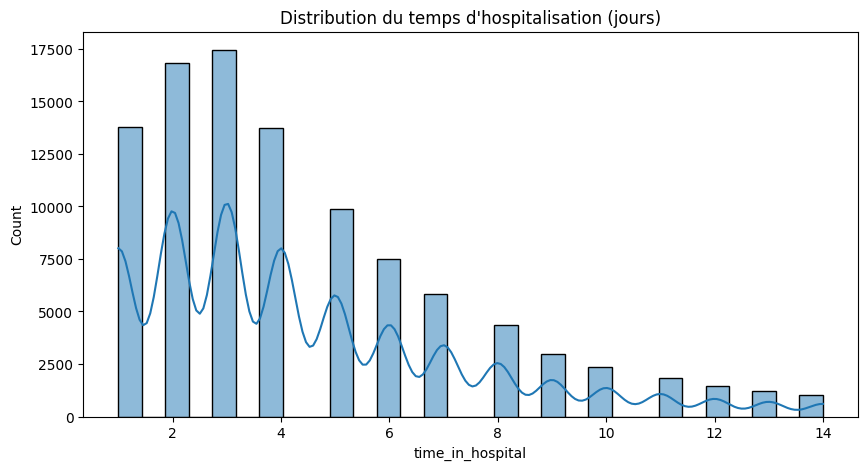

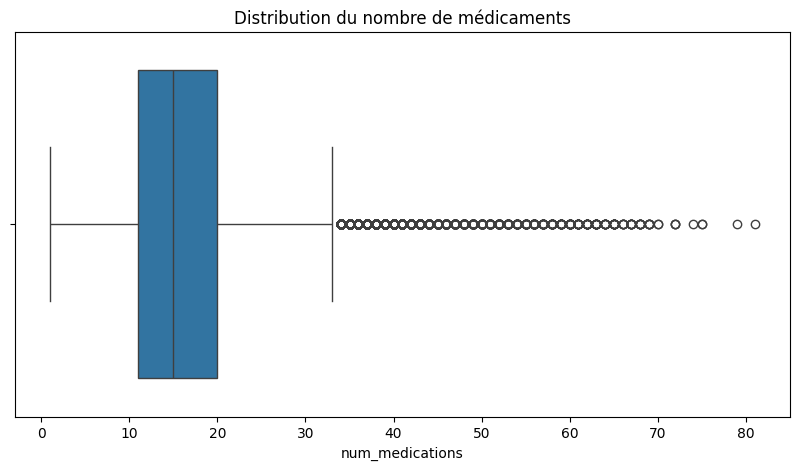

In [10]:
# Temps d'hospitalisation
plt.figure(figsize=(10,5))
sns.histplot(df['time_in_hospital'], bins=30, kde=True)
plt.title('Distribution du temps d\'hospitalisation (jours)')
plt.show()

# Nombre de médicaments
plt.figure(figsize=(10,5))
sns.boxplot(x=df['num_medications'])
plt.title('Distribution du nombre de médicaments')
plt.show()

## Analyse des Médicaments

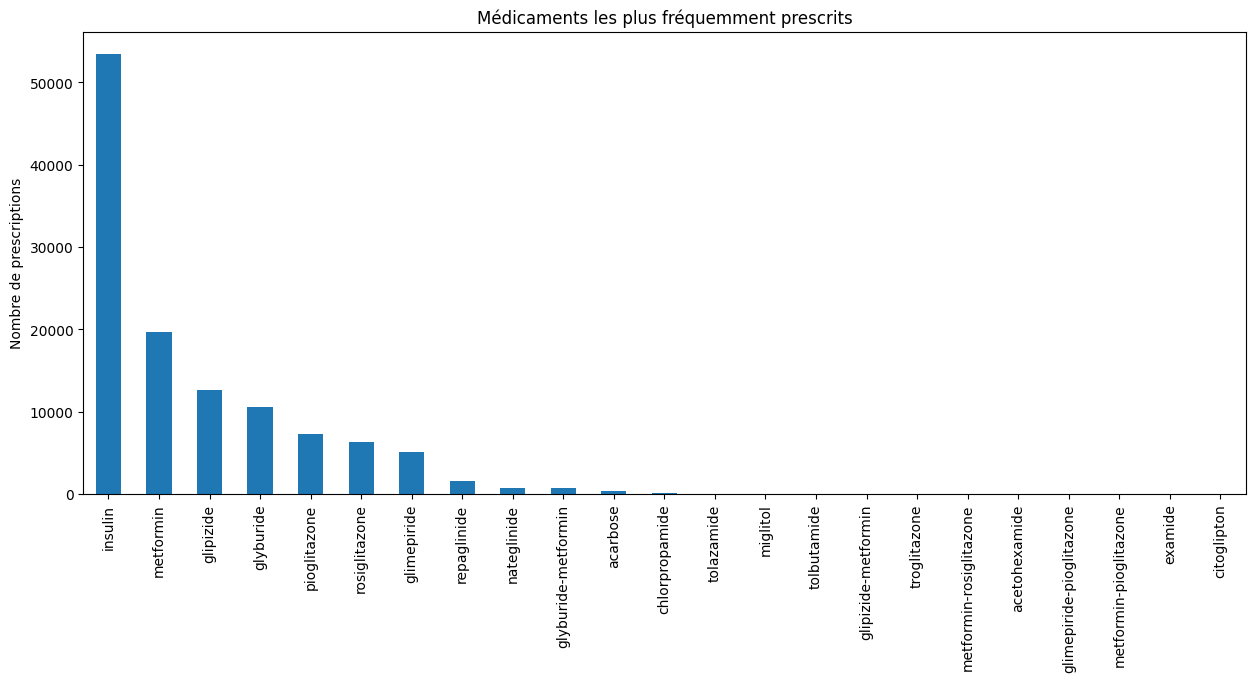

In [11]:
# Médicaments les plus prescrits
med_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
    'tolazamide', 'examide', 'citoglipton', 'insulin',
    'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone'
]

med_data = df[med_cols].apply(lambda x: x.value_counts().get('Steady', 0) + 
                              x.value_counts().get('Up', 0) + 
                              x.value_counts().get('Down', 0))

plt.figure(figsize=(15,6))
med_data.sort_values(ascending=False).plot(kind='bar')
plt.title('Médicaments les plus fréquemment prescrits')
plt.ylabel('Nombre de prescriptions')
plt.show()

In [12]:
med_data[med_data/med_data.sum() <= 0.01].index.tolist()

['nateglinide',
 'chlorpropamide',
 'acetohexamide',
 'tolbutamide',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

## Analyse de la Réadmission

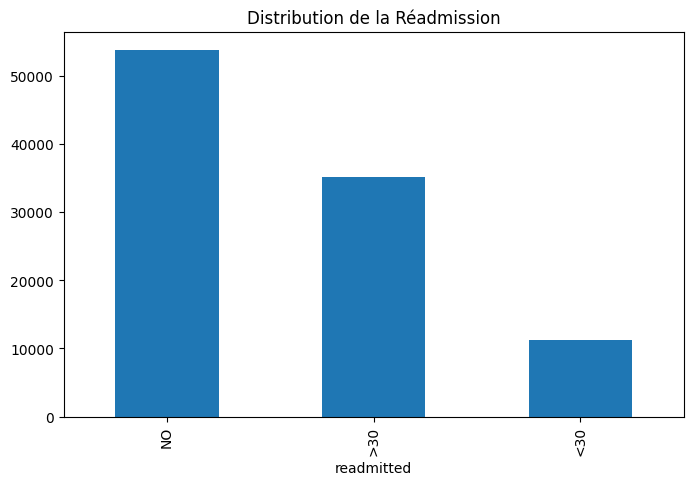

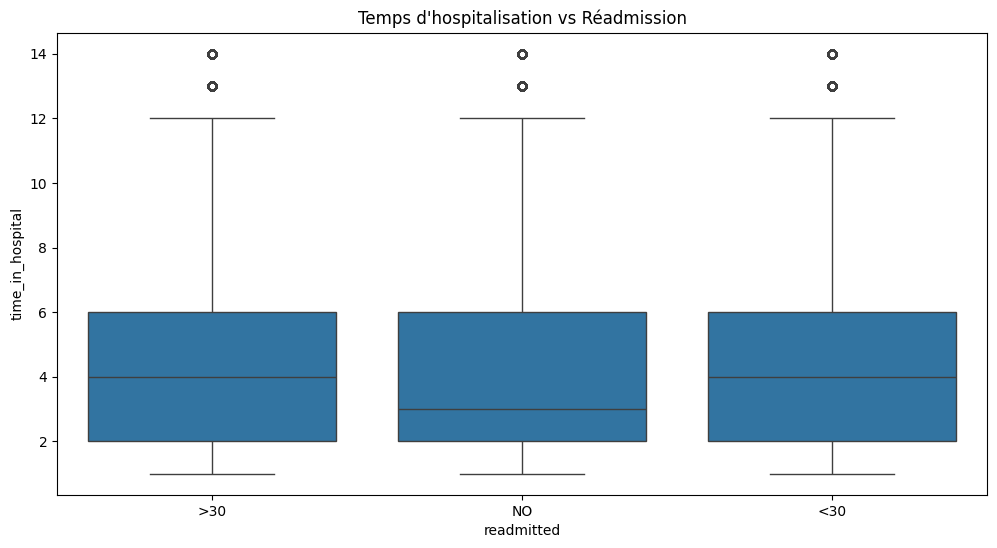

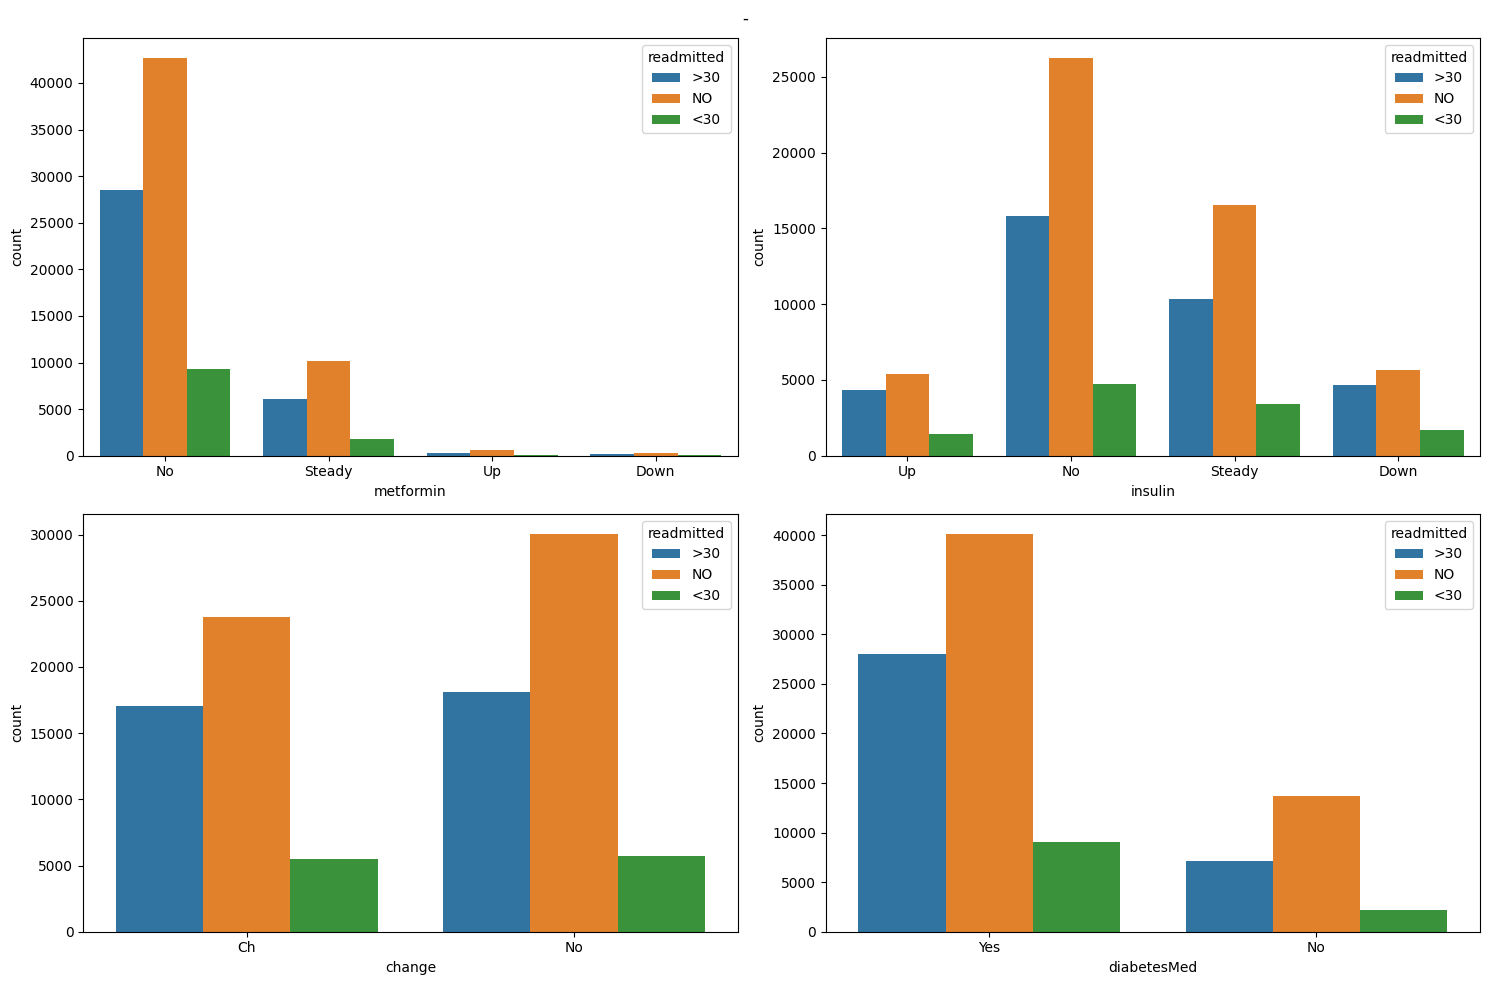

In [13]:
plt.figure(figsize=(8,5))
df['readmitted'].value_counts().plot(kind='bar')
plt.title('Distribution de la Réadmission')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title('Temps d\'hospitalisation vs Réadmission')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15,10))
sns.countplot(x='metformin', hue='readmitted', data=df, ax=axes[0,0])
sns.countplot(x='insulin', hue='readmitted', data=df, ax=axes[0,1])
sns.countplot(x='change', hue='readmitted', data=df, ax=axes[1,0])
sns.countplot(x='diabetesMed', hue='readmitted', data=df, ax=axes[1,1])
plt.suptitle('-')
plt.tight_layout()
plt.show()

In [14]:
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x != 'NO' else 0)

cat_vars = ['race', 'gender', 'age', 'admission_type', 'discharge_disposition', 
            'admission_source', 'medical_specialty', 'max_glu_serum', 
            'A1Cresult', 'change', 'diabetesMed'] + med_cols

num_vars = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
            'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

## Analyse Univariée (Impact Individuel)
### Variables Catégorielles

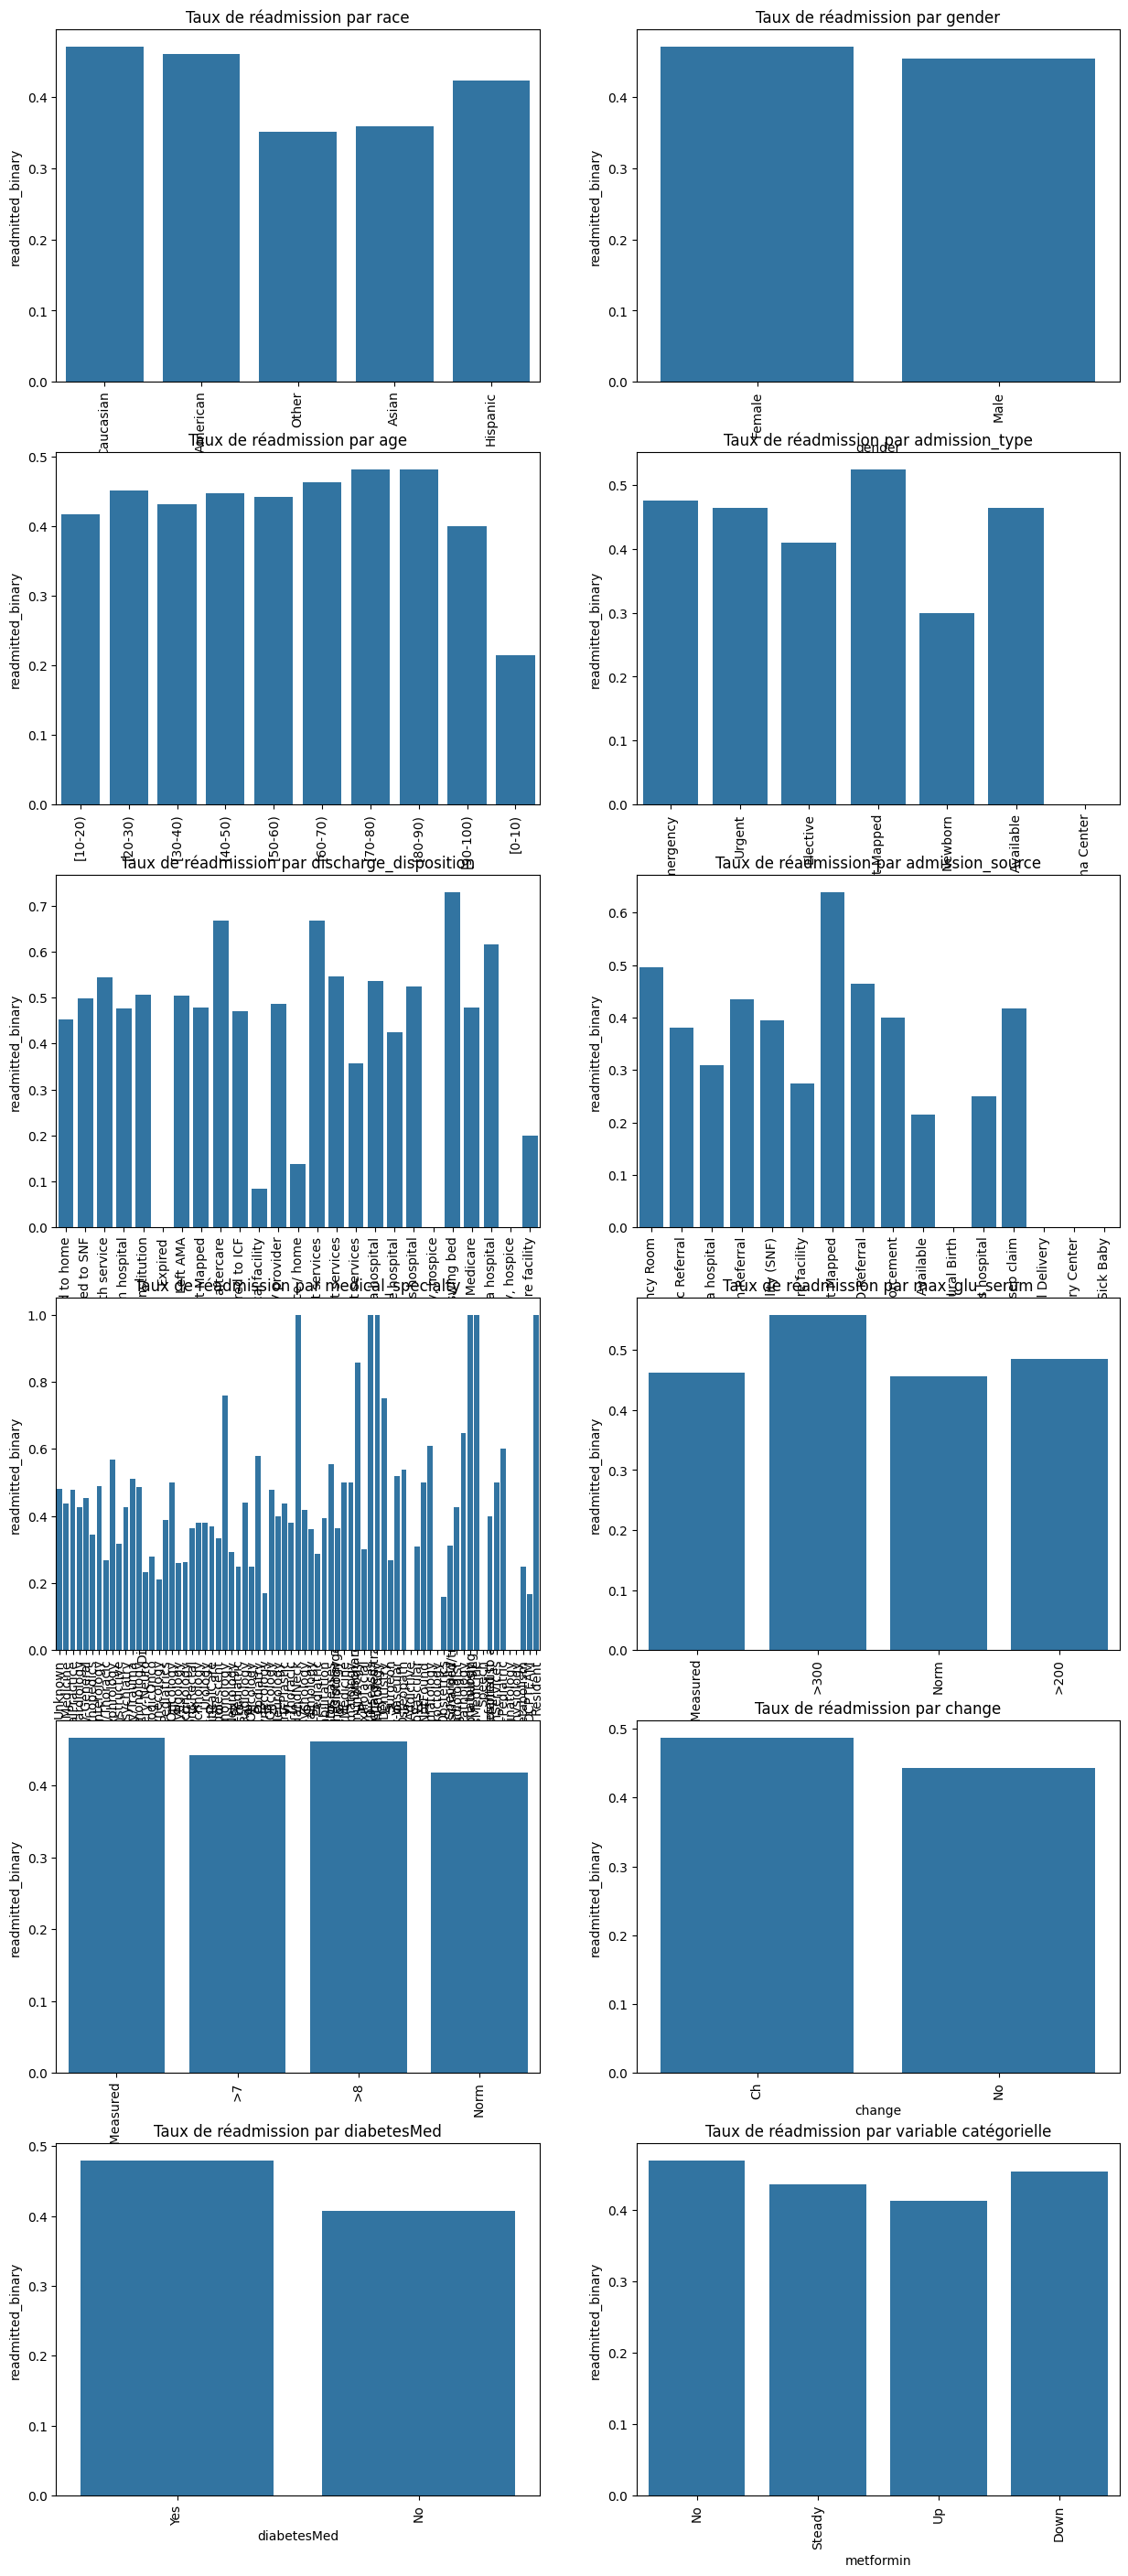

In [15]:
plt.figure(figsize=(15, 35))
for i, var in enumerate(cat_vars[:12]):
    plt.subplot(6, 2, i+1)
    sns.barplot(x=var, y='readmitted_binary', data=df, errorbar=None)
    plt.xticks(rotation=90)
    plt.title(f'Taux de réadmission par {var}')

plt.title('Taux de réadmission par variable catégorielle')
plt.tight_layout(h_pad=5.0)
plt.show()

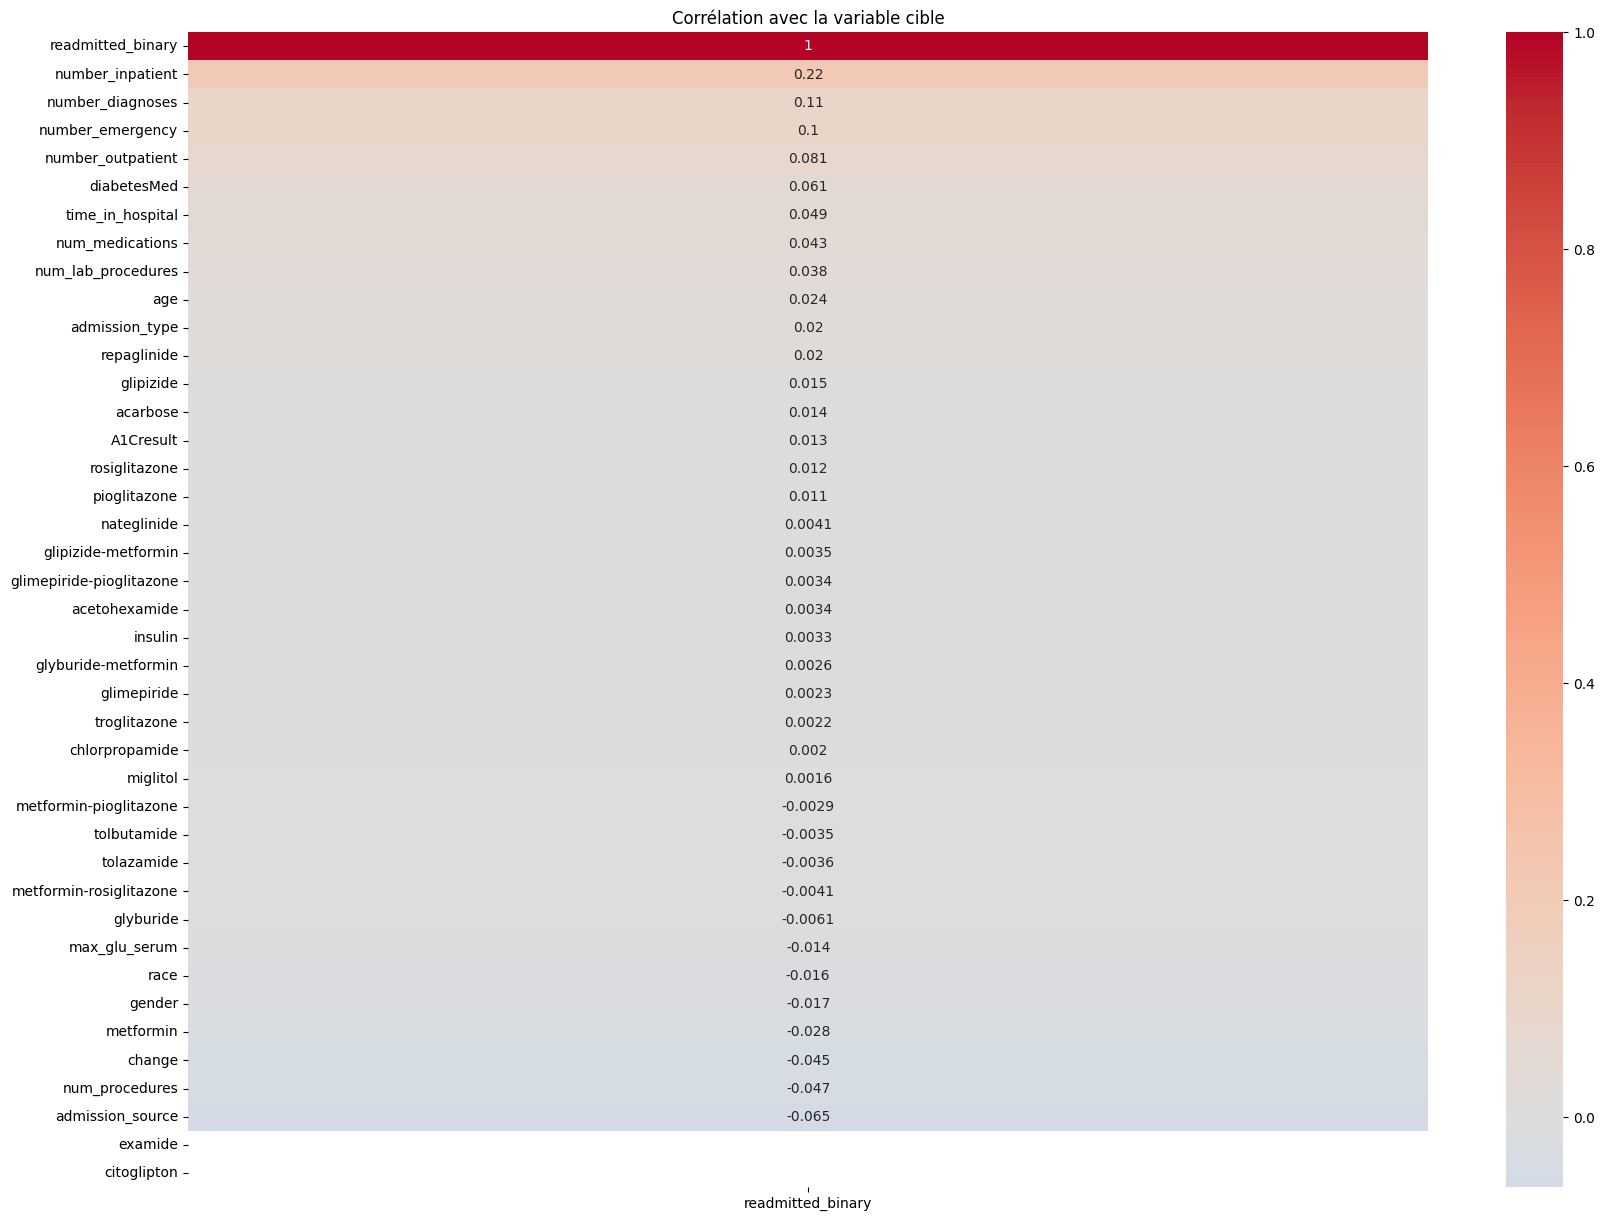

In [16]:
# Création d'un dataframe encodé pour les corrélations
from sklearn.preprocessing import LabelEncoder

df_encoded = df[num_vars].copy()
le = LabelEncoder()

for var in cat_vars:
    if df[var].nunique() < 20:  # On encode seulement les variables avec peu de catégories
        df_encoded[var] = le.fit_transform(df[var].astype(str))

df_encoded['readmitted_binary'] = df['readmitted_binary']

plt.figure(figsize=(20, 15))
sns.heatmap(df_encoded.corr()[['readmitted_binary']].sort_values('readmitted_binary', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Corrélation avec la variable cible')
plt.show()

In [17]:
from scipy.stats import chi2_contingency

chi2_results = []
for var in cat_vars:
    contingency_table = pd.crosstab(df[var], df['readmitted'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({'Variable': var, 'Chi2': chi2, 'p-value': p})

chi2_df = pd.DataFrame(chi2_results).sort_values('Chi2', ascending=False)
display(chi2_df.head(10))

,Variable,Chi2,p-value
4,discharge_disposition,3459.295103,0.000000e+00
6,medical_specialty,1245.108827,1.372358e-174
5,admission_source,1106.713314,1.422424e-213
28,insulin,494.070653,1.591934e-103
10,diabetesMed,376.390227,1.853108e-82
3,admission_type,372.292148,2.751914e-72
0,race,250.114788,1.628921e-49
2,age,240.593979,6.634605e-41
9,change,203.857224,5.407122e-45
11,metformin,102.695692,6.868153e-20


In [18]:
from scipy.stats import f_oneway

anova_results = []
for var in num_vars:
    groups = [df[df['readmitted'] == cat][var] for cat in df['readmitted'].unique()]
    f, p = f_oneway(*groups)
    anova_results.append({'Variable': var, 'F-score': f, 'p-value': p})

anova_df = pd.DataFrame(anova_results).sort_values('F-score', ascending=False)
display(anova_df)

,Variable,F-score,p-value
6,number_inpatient,2870.351099,0.000000e+00
7,number_diagnoses,584.096452,6.264805e-253
5,number_emergency,556.039397,6.996725e-241
4,number_outpatient,342.469736,5.931105e-149
0,time_in_hospital,155.531527,3.614982e-68
3,num_medications,117.423368,1.156980e-51
2,num_procedures,111.543707,4.083290e-49
1,num_lab_procedures,73.289257,1.563613e-32


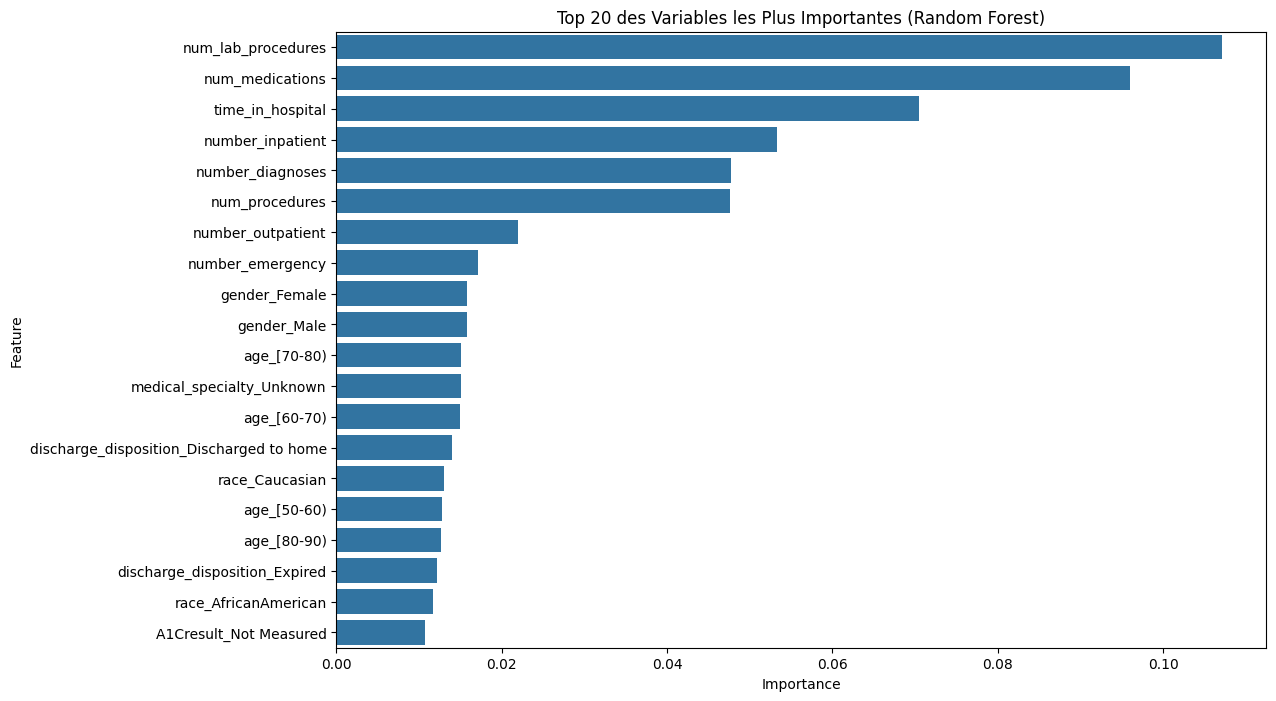

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Préparation des données
X = df.drop(columns=['readmitted', 'readmitted_binary', 'encounter_id', 'patient_nbr'])
y = df['readmitted_binary']

# Transformation des colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_vars),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_vars)
    ])

# Pipeline avec modèle
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipe.fit(X, y)

# Extraction de l'importance des features
feature_names = num_vars + list(pipe.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_vars))
importances = pipe.named_steps['classifier'].feature_importances_

# Création d'un dataframe
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Affichage des 20 plus importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 des Variables les Plus Importantes (Random Forest)')
plt.show()

In [20]:
df.to_csv("data/diabetic_cleaned.csv", index=False)